# Bootstrapping to estimate parameter ranges of nonlinear models

When we first introduced ourselves to regression, we focused the regression algorithm’s ability to find the “truth”, i.e. how close to the true parameter values does the algorithm get.

In statistics and boostrapping, the truth is (typically) unknown and there is noise associated with any given measurement. So our question becomes “how confident am I that the parameters of my model are not zero?” And as discussed in class, all kinds of challenges arise when using bootstrapping. Here, we'll try a simple example.

Let's consider one of our equations for bacterial growth:
\begin{align}
\dot{y} = \frac{y^3}{a+y^3}-by
\end{align}

where y is the concentration of bacterium and a and b are parameters that help define the rate of bacterial growth and loss, respectively. 

You have been provided with data, called "Homework11 Data.csv". Use this data for the following excercises. In this file, you'll find the time points sampled and the concentration of bacterium (y) for 5 independent experiments. We will consider data to be independent across time and experiments.

## Part 1: Plot data and perform initial fitting

In the space below, load the data and write the code to fit the parameters of our model to the data using minimize or fsolve. You may want to revisit your previous homeworks. To make things a little easier, I'll give you the first guess for your parameter. Go with (a,b) = (0.3,0.8). After fitting:
   - clearly indicate what were the parameter values and the value of the cost function you implemented.
   - Plot on one plot the data and the fitted model's response

I made a correctiuon by adding the initial values at t = 0

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from scipy.optimize import minimize


In [19]:
df = pd.read_csv (r'C:\Users\advay\OneDrive\Desktop\PhD\Term-1\Mathematical Modelling in Chemical Engineering\Homework 6 Data.csv')

t=df['Time']
x1=df['Exp1']
x2=df['Exp2']
x3=df['Exp3']
x4=df['Exp4']
x5=df['Exp5']

[exp0] = np.array(df[df["Time"] == 0])
exp0 = exp0[1:]
[exp1] = np.array(df[df["Time"] == 10])
exp1 = exp1[1:]
[exp2] = np.array(df[df["Time"] == 20])
exp2 = exp2[1:]
[exp3] = np.array(df[df["Time"] == 30])
exp3 = exp3[1:]
[exp4] = np.array(df[df["Time"] == 50])
exp4 = exp4[1:]

training_data= np.concatenate([exp0, exp1, exp2, exp3, exp4])

time = [0,0,0,0,0,10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50]



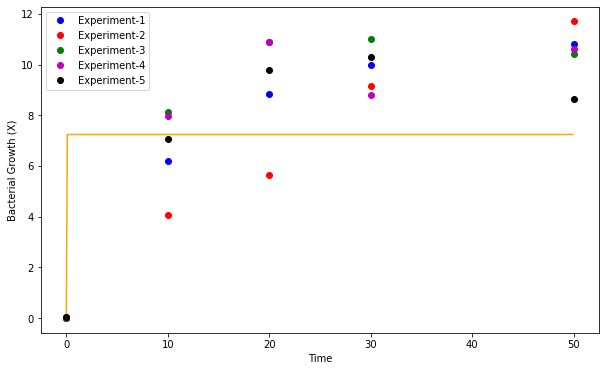

In [23]:
def odes(y, t, a, b):
    
    f = y**3/(a + y**3) - b*y
    
    return f

t_steps = np.arange(0,50,0.1)

y0 = np.mean(exp0)

    
tdata = odeint(odes, y0, t_steps,args= (-379.58926322, -3640.07132226))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(t_steps, tdata[:,0], color = 'orange')
plt.xlabel("Time")
plt.ylabel("Bacterial Growth (X)")
plt.plot(t, x1,'bo',label="Experiment-1")
plt.plot(t, x2,'ro',label='Experiment-2')
plt.plot(t, x3,'go',label='Experiment-3')
plt.plot(t, x4,'mo',label='Experiment-4')
plt.plot(t, x5,'ko',label='Experiment-5')
plt.legend()

def RMSE(params):
    a, b = params;
    ODE_output = odeint(odes, y0, t_steps, args = (a,b));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

In [22]:
sol = minimize(RMSE, x0 = (-379.58926322, -3640.07132226));
print(sol);

      fun: 451.237060450463
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ -379.58926322, -3640.07132226])


## Part 2: Use sampling with replacement to create distributions of parameters that fit the data

Our hypothesis is that both a and b are greater than 0. Use the bootstrap method to create distributions of estimates of our parameter values. We can do this by, **for each iteration:**
   - Resample the data at each time point using sample with replacement (search online how to do).
   - Use minimize to refit the model to the resampled data
   - Save the fitted parameter estimates and the value of the cost function.
   
Do this for at least 200 iterations. HINT: this code may take a long time to run. It would be best to get the code working with only a few iterations. And once happy, then try 200. After completing, plot histograms of the fitted parameter values and cost function values. Figures must be clearly labeled and obvious to read. 

Based on these data, what is the p value for the null hypothesis that a and b are equal to zero? Calculate the one sided p value, based on the idea that we expect them to be greater than zero.
   

In [6]:
ex0= np.random.choice(exp0,5)
ex1= np.random.choice(exp1,5)
ex2= np.random.choice(exp2,5)
ex3= np.random.choice(exp3,5)
ex4= np.random.choice(exp4,5)

training_data2= np.concatenate([ex0, ex1, ex2, ex3, ex4])

In [7]:
def RMSE(params,training_data2):
    a, b = params;
    ODE_output = odeint(odes, y0, t_steps, args = (a,b));
    err = training_data2 - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

In [8]:
aa = np.zeros(200)
bb = np.zeros_like(aa)

for i in np.arange(200):
    ex0= np.random.choice(exp0,5)
    ex1= np.random.choice(exp1,5)
    ex2= np.random.choice(exp2,5)
    ex3= np.random.choice(exp3,5)
    ex4= np.random.choice(exp4,5)

    training_data2= np.concatenate([ex0, ex1, ex2, ex3, ex4])
    sol = minimize(RMSE, x0 = (0.3,  0.8),args=(training_data2));
    aa[i] = sol.x[0];
    bb[i] = sol.x[1];

C:\Users\advay\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\advay\AppData\Local\Temp\ipykernel_26564\742810298.py:3: RuntimeWarning: divide by zero encountered in true_divide
  f = y**3/(a + y**3) - b*y
C:\Users\advay\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\advay\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\advay\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this ca

Text(0.5, 1.0, 'For parameter a')

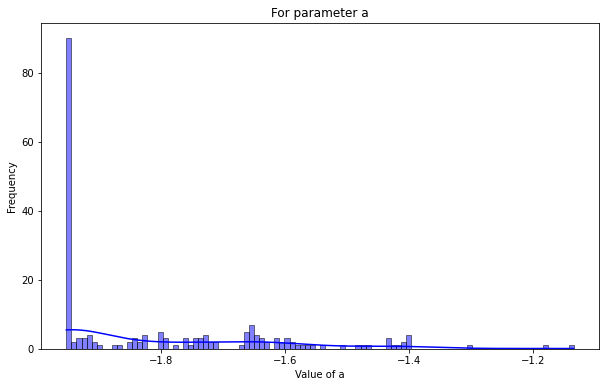

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

sns.histplot(aa, kde=True,color = 'blue', bins=100)
plt.ylabel('Frequency')
plt.xlabel('Value of a')
plt.title("For parameter a")

In [10]:
c1 = 0
for i in aa :
    if i > 0 :
        c1 = c1 + 1
  
# printing the intersection 
print ("The numbers greater than zero : " + str(c1))

The numbers greater than zero : 0


In [11]:
p1 = c1/200
print ("The one side p-value for a is : " + str(p1))

The one side p-value for a is : 0.0


In [12]:
print(stats.ttest_1samp(aa,0))

Ttest_1sampResult(statistic=-139.1905039193242, pvalue=2.952180923008727e-200)


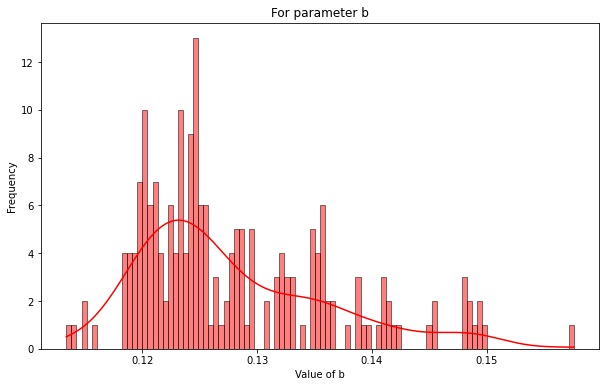

In [13]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

sns.histplot(bb, kde=True,color = 'red', bins=100)
plt.ylabel('Frequency')
plt.xlabel('Value of b')
plt.title("For parameter b");


In [14]:
c2 = 0
for i in bb :
    if i > 0 :
        c2 = c2 + 1
  
# printing the intersection 
print ("The numbers greater than zero : " + str(c2))

The numbers greater than zero : 200


In [15]:
p2 = c2/200
print ("The one side p-value for a is : " + str(p2))

The one side p-value for a is : 1.0


In [16]:
print(stats.ttest_1samp(bb,0))

Ttest_1sampResult(statistic=216.08746951706226, pvalue=5.172552567149685e-238)


## Part 3 Analyze fit results

One a single figure, plot the model's response vs time for all 200 estimates of the parameter values. Are the fits reasonable? Should any of the fits be discounted? Why so? Does this change how you define your p values above? **Defend your answer here and include any plots as necessary:**



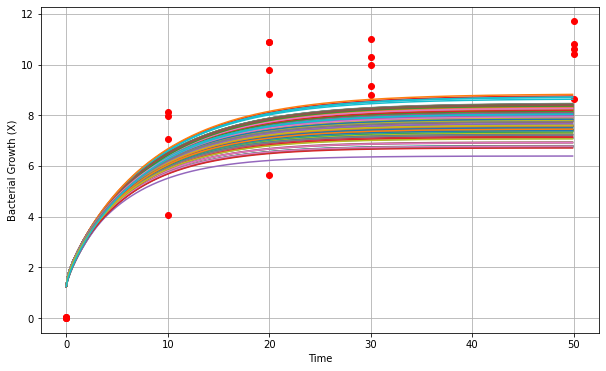

In [17]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(time, training_data, 'ro')
plt.xlabel("Time")
plt.ylabel("Bacterial Growth (X)")
plt.grid()

for i in np.arange(200):
    tdata = odeint(odes, y0, t_steps,args= (aa[i] ,bb[i]))
    plt.plot(t_steps, tdata)

#### Here it is seen that for 200 different values of a and b, we get a number of line which are well fitted in the given experimental data, to get the minimum error and accurately depict the experimental data in form of a model.

## Topic for project

### Covid fatality along with 
#### 1. Data of people consuming Vitamin-C in their diet
#### 2. Data of people who are insomniac(Sleep deprived) and consuming sleeping pills.